<a href="https://colab.research.google.com/github/marino1846067/CMP2021/blob/main/Angular_Resolution_23_01_2019_Exam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

COMPUTING METHODS FOR PHYSICS
===============
23rd January 2020 Exam

Lorenzo Graziotto, 1762218

----------------------------

# Angular Resolution

Importo i pacchetti necessari:

In [ ]:
import matplotlib.pyplot as plt 
import numpy as np
myColors = ['#16A086','#2A80B9','#8F44AD','#F39C11','#C1392B','#2D3E50']

Dichiaro i valori costanti:

In [ ]:
mPi = 135*1e-3 #GeV mass of pion 0
E0 = [0.5, 1, 5, 10, 50, 100] #GeV energy of pion in lab frame
alpha0 = 0.2 #rad angular resolution of detector
nSimul = 10000 #number of decay simulations

La densità di probabilità di decadimento in funzione dell'angolo (con $0 \leq \alpha \leq \pi$) è 
$$
f(\alpha) = \frac{m_0^2}{4E_0^2}\frac{\cos(\alpha/2)}{\sin^2(\alpha/2)\sqrt{\sin^2(\alpha/2)-m_0^2/E_0^2}}
$$
dove $E_0$ è l'energia del pione nel laboratorio, e $m_0$ è la massa del pione. Dalla condizione sulla radice al denominatore si ottiene l'estremo inferiore dell'angolo a cui i fotoni possono essere emessi
$$
\alpha_\text{min} = 2\arcsin(m_0 / E_0)
$$

e si osservi che $\alpha_\text{min} \neq \alpha_0$: il primo è un limite del processo fisico di decadimento, il secondo dell'apparato di misura.

La definisco quindi come funzione nel programma in modo da utilizzarla più agevolmente.

In [ ]:
def decayProb(alpha,E0):
    if (alpha > 2*np.arcsin(mPi/E0)):
        result = mPi**2/(4*E0**2)*np.cos(alpha/2.)/(np.sin(alpha/2.)**2 * np.sqrt(np.sin(alpha/2.)**2 - mPi**2/E0**2))
    else:
        result = None
    return result

Realizzo il grafico della densità di probabilità $f(\alpha)$ in funzione dell'angolo, per le varie energie della lista __E0__. Utilizzo la scala logaritmica per chiarezza, e ricordo che ovviamente essendo una densità di probabilità non è costretta ad assumere valori compresi tra 0 e 1. Osservo inoltre che la distribuzione diverge per $\alpha = \alpha_\text{min}$.

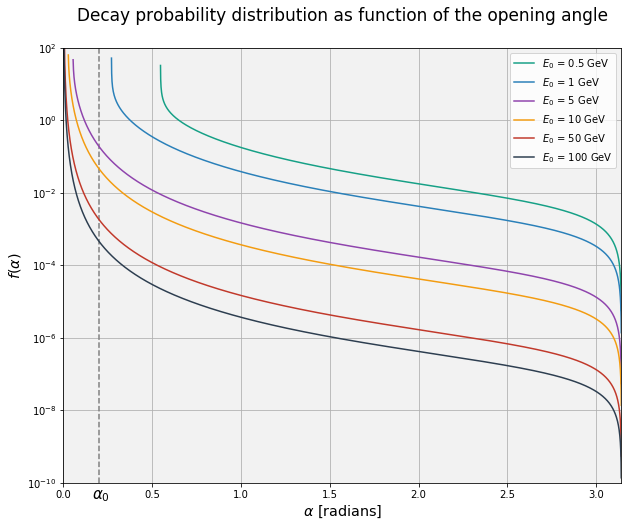

In [ ]:
%matplotlib inline
alpha = np.arange(0,np.pi,1e-3) #values for which the function is calculated
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111,autoscale_on=False,xlim=(0,np.pi),ylim=(1e-10,1e2),facecolor='#f2f2f2')
ax.set_xlabel("$\\alpha$ [radians]",fontsize='x-large')
ax.set_ylabel("$f(\\alpha)$",fontsize='x-large')
ax.set_yscale("log")
ax.axvline(alpha0,color="grey",ls="--")
ax.text(alpha0-0.04,0.35e-10,"$\\alpha_0$",fontsize=15)
ax.set_title("Decay probability distribution as function of the opening angle\n",fontsize=17)
ax.grid()
i=0 #to change colors
for E in E0:
    f_a = np.array([decayProb(a,E) for a in alpha])
    lab = "$E_0$ = {0} GeV".format(E)
    ax.plot(alpha,f_a, label=lab, color=myColors[i])
    i+=1
ax.legend()

## Frazione dei decadimenti con fotoni risolti

La frazione dei decadimenti in cui il detector riesce a risolvere i fotoni è definita come

$$
p(E_0) = \frac{\int_{\alpha_0}^\pi f(\alpha) d\alpha}{\int_{\alpha_\text{min}}^\pi f(\alpha) d\alpha}
$$

dove l'estremo inferiore dell'integrale al numeratore è l'angolo minimo a cui il detector è sensibile, mentre l'estremo inferiore dell'integrale al denominatore è l'angolo minimo ammesso dal fenomeno fisico, già definito più sopra.

Il metodo d'integrazione scelto è quello di Simpson, che prevede di suddividere il supporto di integrazione $[a,b]$ in $n$ intervalli di larghezza $h = (b-a)/n$ (con $n$ pari), e si ha
$$
\int_a^b f(x) dx \simeq \frac{h}{3}\sum_{j=1}^{n/2}\bigg[f(x_{2j-2}) + 4f(x_{2j-1}) + f(x_{2j}) \bigg]
$$
con $x_j = a + j\cdot h$. Definisco la funzione per integrare con metodo di Simpson una generica funzione __func__, che può eventualmente avere quali argomenti aggiuntivi __*args__.

In [ ]:
nIntervals = 100000
def SMPintegrator(inf,sup,func,*args):
    h = (sup-inf) / nIntervals
    sum = 0.
    for i in range(1,int(nIntervals/2)):
        sum += func(inf+(2*i-2)*h,*args) + 4*func(inf+(2*i-1)*h,*args) + func(inf+(2*i)*h,*args)
    
    return h/3.*sum

Per l'integrale al denominatore vi è però il problema che all'estremo inferiore l'integrando diverge, pertanto l'integrale numerico rischia di dare un risultato sbagliato e dipendente dalla larghezza dell'intervallo scelto. È opportuno quindi fare un cambio di variabile per eliminare la singolarità:
$$ 
\sin^2(\alpha/2) - \frac{m_0^2}{E_0^2} = t^2
$$
dunque si ha
$$
f(t) = \frac{m_0^2}{4E_0^2}\frac{2}{\big(t^2+m_0^2/E_0^2\big)^{3/2}},
$$

che è analitica sull'intervallo chiuso di integrazione, che ora è $\bigg[0,\sqrt{1-m_0^2/E_0^2}\bigg]$. La definisco nella cella seguente.

In [ ]:
def decayProbChangeVar(t,E0):
    return mPi**2/(2*E0**2) * 1 / (t**2 + mPi**2/E0**2)**(3./2.)

Ne faccio un plot al variare di $E_0$ per chiarezza espositiva.

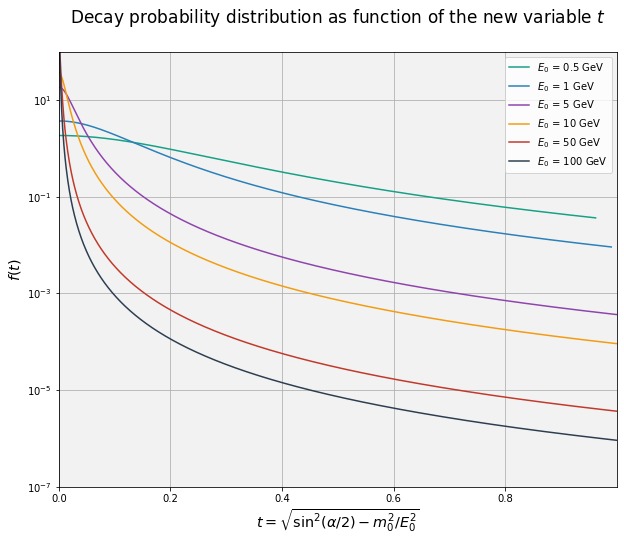

In [ ]:
%matplotlib inline

fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111,autoscale_on=False,ylim=(1e-7,1e2),facecolor='#f2f2f2')
ax.set_xlabel("$t = \sqrt{\sin^2(\\alpha/2)-m_0^2/E_0^2}$",fontsize='x-large')
ax.set_ylabel("$f(t)$",fontsize='x-large')
ax.set_yscale("log")
ax.set_title("Decay probability distribution as function of the new variable $t$\n",fontsize=17)
ax.grid()
i=0
for E in E0:
    sup = np.sqrt(1-mPi**2/E**2)
    ax.set_xlim(0,sup)
    tRan = np.arange(0,sup,1e-3)
    f_t = np.array([decayProbChangeVar(t,E) for t in tRan])
    lab = "$E_0$ = {0} GeV".format(E)
    ax.plot(tRan,f_t, label=lab,color=myColors[i])
    i+=1
ax.legend()

Adesso calcolo l'integrale al denominatore con il metodo di Simpson e lo confronto con il risultato analitico, che è noto (in quanto è quello da cui si parte, nello studio del decadimento del pione in due fotoni, per ricavare la densità di probabilità in funzione dell'angolo):
$$
\int_{\alpha_\text{min}}^\pi f(\alpha) d\alpha = \int_{0}^\sqrt{1-m_0^2/E_0^2} f(t) d t = \frac{\sqrt{E_0^2 - m_0^2}}{2E_0}
$$

In [ ]:
for E in E0:
    supremum = np.sqrt(1-mPi**2/E**2)
    print("E0 = {0} GeV".format(E),end="\t")
    print("Simpson = ",SMPintegrator(0.,supremum,decayProbChangeVar,E), end="\t")
    print(" analytical = ",0.5*np.sqrt(E**2-mPi**2)/E)

E0 = 0.5 GeV	Simpson =  0.4814294591378841	 analytical =  0.48143016108258113
E0 = 1 GeV	Simpson =  0.4954226186462114	 analytical =  0.49542279923313987
E0 = 5 GeV	Simpson =  0.4998177094852614	 analytical =  0.4998177167728251
E0 = 10 GeV	Simpson =  0.4999544336014832	 analytical =  0.49995443542386936
E0 = 50 GeV	Simpson =  0.4999981774237875	 analytical =  0.49999817749667846
E0 = 100 GeV	Simpson =  0.4999995443565702	 analytical =  0.4999995443747924


Osservo che si ha accordo dei risultati fino alla quarta cifra decimale per il valore più basso di energia; l'accordo è migliore all'aumentare di $E_0$. Per confronto, integrando direttamente la $f(\alpha)$ si ottiene

In [ ]:
for E in E0:
    alphamin = 2*np.arcsin(mPi/E)
    print("E0 = {0} GeV".format(E),end="\t")
    print("Simpson = ",SMPintegrator(alphamin+1e-5,np.pi,decayProb,E),end="\t")
    print(" analytical =",0.5*np.sqrt(E**2-mPi**2)/E)

E0 = 0.5 GeV	Simpson =  0.47853719407372164	 analytical = 0.48143016108258113
E0 = 1 GeV	Simpson =  0.49130813261506956	 analytical = 0.49542279923313987
E0 = 5 GeV	Simpson =  0.4906461059902029	 analytical = 0.4998177167728251
E0 = 10 GeV	Simpson =  0.48699663701429363	 analytical = 0.49995443542386936
E0 = 50 GeV	Simpson =  0.47108087736086846	 analytical = 0.49999817749667846
E0 = 100 GeV	Simpson =  0.45917140917657856	 analytical = 0.4999995443747924


risultati molto meno accurati, e dipendenti da quale minimo di integrazione si sceglie (non si può arrivare fino a $\alpha_\text{min}$ perché lì si ha divergenza).

Calcolo ora la frazione dei decadimenti con fotoni risolti: dal grafico della distribuzione $f(\alpha)$ riportato all'inizio è evidente che per $E_0 = 0.5$ GeV e $E_0 = 1$ GeV, poiché l'angolo minimo permesso dal fenomeno di decadimento è maggiore di quello a cui è sensibile il detector, tutti i fotoni saranno risolti. Per gli altri si ha $\alpha_0 > \alpha_\text{min}$, quindi per l'integrale al numeratore si utilizzerà direttamente la $f(\alpha)$.

In [ ]:
p_E0 = np.array([])
for E in E0:
    alphamin = 2*np.arcsin(mPi/E)
    if alphamin > alpha0:
        p_E0 = np.append(p_E0,1)
    else:
        supremum = np.sqrt(1-mPi**2/E**2) #sup of denominator integral
        den = SMPintegrator(0.,supremum,decayProbChangeVar,E)
        num = SMPintegrator(alpha0,np.pi,decayProb,E)
        p_E0 = np.append(p_E0,num/den)

Faccio ora un plot della probabilità di risoluzione in funzione di $E_0$, in scala log-log per maggiore chiarezza espositiva.

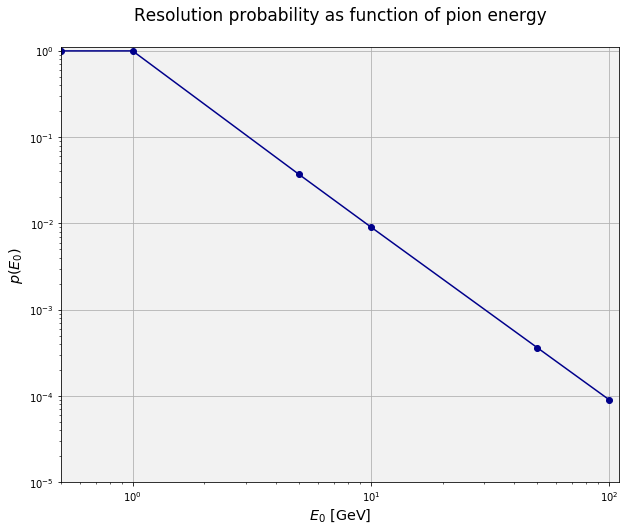

In [ ]:
%matplotlib inline

fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111,autoscale_on=False,xlim=(0.5,1.1e2),ylim=(1e-5,1.1),facecolor='#f2f2f2')
ax.set_xlabel("$E_0$ [GeV]",fontsize='x-large')
ax.set_ylabel("$p(E_0)$",fontsize='x-large')
ax.set_yscale("log")
ax.set_xscale("log")
ax.set_title("Resolution probability as function of pion energy\n",fontsize=17)
ax.grid()
ax.plot(E0,p_E0,"o-",color="darkblue")

In questo caso, essendo una probabilità, deve essere compresa tra $0$ e $1$.

L'andamento lineare in scala log-log non stupisce: partendo dalla primitiva di $f(\alpha)$ si può calcolare analiticamente la frazione di decadimenti risolti

$$
p(E_0) = 1- \frac{\sqrt{E_0^2 - m_0^2/\sin^2(\alpha/2)}}{\sqrt{E_0^2-m_0^2}}
$$

che sviluppata in serie per $m_0 \ll E_0$ restituisce

$$
\log\big(p(E_0)\big) \simeq \text{const} - 2\log (E_0).
$$

## Gaussian Smearing

### Estrazione degli angoli dei fotoni e controllo della distribuzione

_In questa prima sezione verifico il funzionamento dell'estrazione dei fotoni, quindi non applico ancora lo smearing gaussiano._

Per generare i valori veri degli angoli $\theta_1$ e $\theta_2$ a cui vengono emessi i fotoni nel laboratorio devo passare al sistema di riferimento del centro di massa del pione, in cui, poiché esso è una particella di spin 0, i fotoni vengono emessi in modo isotropo agli angoli $\theta^{*}$ e $\theta^{*}+\pi$.
Gli angoli nel sistema del laboratorio sono poi dati da
$$
\theta_{1,2} = \arctan\bigg(\frac{\sin\theta^{*}}{\gamma(\beta \pm \cos\theta^{*})}\bigg)
$$
dove $\beta = p_0 / E_0 = \sqrt{E_0^2-m_0^2}/E_0$.

In [ ]:
def theta(thetaStar,E0):
    beta = np.sqrt(E0**2-mPi**2) / E0
    gamma = E0/mPi
    theta12 = np.array([])
    
    for i in (1,2):
        theta = np.arctan( np.sin(thetaStar) / ( gamma* (beta+np.cos(thetaStar)) ) )
        if (np.cos(thetaStar) < -beta):
            theta += np.sign(thetaStar)*np.pi
        theta12 = np.append(theta12,theta)
        thetaStar += np.pi - 2*np.pi*np.heaviside(thetaStar,1)
        
    return theta12

La funzione qui sopra restituisce direttamente un array con i due angoli nel sistema di riferimento del laboratorio, ciascuno definito nel range $[-\pi,\pi)$; la funzione di Heaviside serve per riportare l'angolo in questo intervallo, mentre l'__if__ verifica quando l'argomento dell'arcotangente è negativo, in modo da tener conto correttamente del fatto che il fotone viene emesso all'indietro nel laboratorio.

Ora simulo __nSimul__ decadimenti del pione per ogni energia della lista __E0__, ovvero estraggo __nSimul__ valori dell'angolo $\theta^{*}$ nel sistema di riferimento del centro di massa. È vitale osservare che devo distribuire in modo uniforme il coseno dell'angolo, da cui poi ricavo $\theta^{*}$, perché l'emissione è isotropa in tutto lo spazio.
Creo dunque l'array __angles__ di supporto, e calcolo i valori di $\alpha = \vert\theta_1 - \theta_2\vert$ (ci va il meno perché sono misurati nello stesso verso antiorario, e metto il modulo per avere la separazione angolare positiva). __observed__ tiene conto dei fotoni effettivamente osservati dal rivelatore (cioè con separazione angolare superiore a $\alpha_0$.

In [ ]:
p_E0_simul = np.array([])
np.random.seed(20) #seed is put only for aesthetical convenience. It can be removed.
for E in E0:
    thetaStar = np.array([ np.arccos(point) for point in  np.random.uniform(-1,1,size=nSimul) ])
    angles = np.array([ theta(thetaS,E) for thetaS in thetaStar  ])
    alphaGen = np.array([ np.abs(ang[0]-ang[1]) for ang in angles])
    observed = np.array([a>alpha0 for a in alphaGen]).sum() #Since True is 1, it calculates the number of true values
    p_E0_simul = np.append(p_E0_simul,observed/nSimul)
    
    alphamin = 2*np.arcsin(mPi/E)
    #to control that the angle generation is correct
    print("E0 = {0:<4} Angles in [alpha_min, π) : {1}".format(E,(np.amin(alphaGen)>alphamin) and (np.amax(alphaGen)<np.pi)))

E0 = 0.5  Angles in [alpha_min, π) : True
E0 = 1    Angles in [alpha_min, π) : True
E0 = 5    Angles in [alpha_min, π) : True
E0 = 10   Angles in [alpha_min, π) : True
E0 = 50   Angles in [alpha_min, π) : True
E0 = 100  Angles in [alpha_min, π) : True


Realizzo ora un plot per verificare che la frazione dei fotoni osservati calcolata con la simulazione degli __nSimul__ decadimenti sia la stessa calcolata precedentemente facendo il rapporto degli integrali della distribuzione $f(\alpha)$. Ricordo che poiché nel caso $E_0 = 100$ GeV la funzione vale circa $10^{-4}$, e __nSimul = 10 000__, mi aspetto di vedere il più delle volte o zero o un evento, quindi nel grafico l'ultimo punto relativo alla simulazione potrebbe non apparire (perché ha $p(E_0) = 0$ e sono in scala log) [_Ho messo apposta un seed che faccia vedere questo punto_].

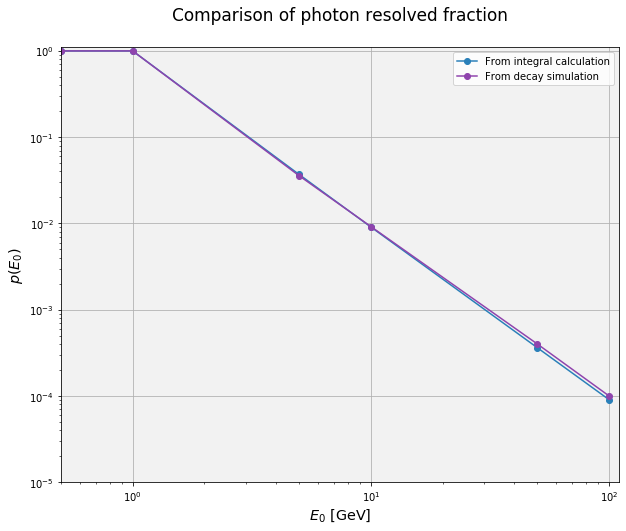

In [ ]:
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111,autoscale_on=False,xlim=(0.5,1.1e2),ylim=(1e-5,1.1),facecolor='#f2f2f2')
ax.set_xlabel("$E_0$ [GeV]",fontsize='x-large')
ax.set_ylabel("$p(E_0)$",fontsize='x-large')
ax.set_yscale("log")
ax.set_xscale("log")
ax.grid()
ax.set_title("Comparison of photon resolved fraction\n",fontsize=17)
ax.plot(E0,p_E0,"o-",label="From integral calculation",color=myColors[1])
ax.plot(E0,p_E0_simul,"o-", label="From decay simulation",color=myColors[2])
ax.legend()

### Applicazione dello smearing gaussiano

Dopo aver estratto $\theta^{*}$ nel centro di massa e aver calcolato $\theta_1$ e $\theta_2$ come prima, estraggo ora dei valori centrati attorno agli angoli veri e distribuiti gaussianamente con media __mu__ e deviazione standard __sigma__.

In [ ]:
mu = 0 #mean of Gaussian distribution
sigma = (0.01, 0.05, 0.1) #standard deviation of the distribution, with respect to central value

In [ ]:
np.random.seed(30) #seed is put only for aesthetical convenience. It can be removed.
sigmaDict = {i: np.array([]) for i in sigma}
for s in sigmaDict.keys():
    for E in E0:
        angles = np.array([ theta(np.arccos(point),E) for point in np.random.uniform(-1,1,size=nSimul) ])
        smearAng = np.array([ np.random.normal(th,np.abs(s*th)) for th in angles ])
        alphaGen = np.array([ np.abs(th[0]-th[1]) for th in smearAng ])
    
        observed = np.array([a>alpha0 for a in alphaGen]).sum()
        sigmaDict[s] = np.append(sigmaDict[s],observed/nSimul)

Ne faccio un plot in funzione dell'energia del pione.

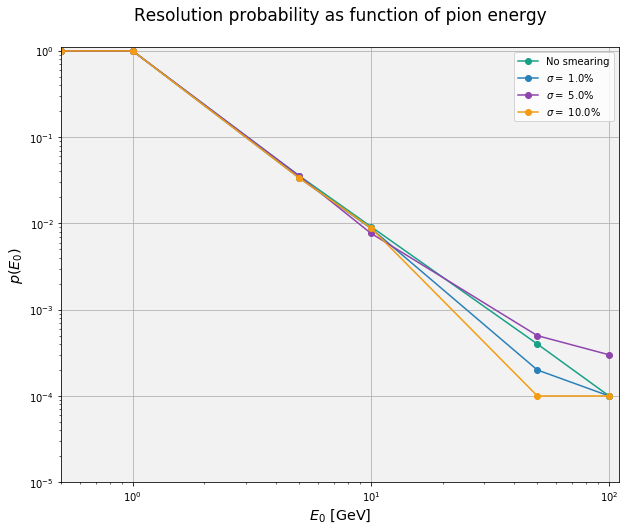

In [ ]:
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111,autoscale_on=False,xlim=(0.5,1.1e2),ylim=(1e-5,1.1),facecolor='#f2f2f2')
ax.set_xlabel("$E_0$ [GeV]",fontsize='x-large')
ax.set_ylabel("$p(E_0)$",fontsize='x-large')
ax.set_yscale("log")
ax.set_xscale("log")
ax.set_title("Resolution probability as function of pion energy\n",fontsize=17)
ax.grid()
ax.plot(E0,p_E0_simul,"o-", label="No smearing",color=myColors[0])
i=1
for s in sigmaDict.keys():
    lab = "$\sigma =$ {0}%".format(s*100)
    ax.plot(E0,sigmaDict[s],"o-", label=lab,color=myColors[i])
    i+=1
ax.legend()

Si osserva che nonostante lo smearing gaussiano la frazione di decadimenti risolti non si discosta più di un ordine di grandezza dal caso ideale.

## Frazione di fotoni non risolti

La frazione di decadimenti persi, poiché i fotoni non vengono risolti, è data dal complementare di quanto calcolato prima. Aggiungo al dizionario __sigmaDict__, che contiene per ogni __sigma__ l'array di __p(E0)__, i dati relativi all'assenza di smearing, e costruisco un nuovo dizionario dove per ogni __sigma__ riporto __1-p(E0)__, cioè la frazione di decadimenti non risolti.

In [ ]:
sigmaDict[0] = p_E0_simul
lostPhotDict = {l:(1-sigmaDict[l])*100 for l in sigmaDict.keys()}

Realizzo infine con __pandas__ un dataframe che contenga i dati per le diverse energie e i diversi __sigma__, in modo da stampare una tabella con le percentuali dei decadimenti non identificati.

In [ ]:
import pandas as pd

print("\nPercentage of lost decays:")

df = pd.DataFrame(lostPhotDict,columns={s:"$\sigma$ = {0}%".format(s*100) for s in lostPhotDict.keys()})
df = df.sort_index(axis=1)
df = df.rename(columns={s:"$\sigma$ = {0}%".format(s*100) for s in lostPhotDict.keys()})
df.insert(0,"E0 [GeV]",E0)
df.style.format({s: "{0:.2f}" for s in df.columns}).hide_index()


Percentage of lost decays:


E0 [GeV],$\sigma$ = 0%,$\sigma$ = 1.0%,$\sigma$ = 5.0%,$\sigma$ = 10.0%
0.50,0.00,0.00,0.00,0.00
1.00,0.00,0.00,0.00,0.00
5.00,96.43,96.63,96.44,96.63
10.00,99.08,99.12,99.23,99.11
50.00,99.96,99.98,99.95,99.99
100.00,99.99,99.99,99.97,99.99


Si osserva che nel passaggio da 1 GeV a 5 GeV non si riescono a risolvere più del 95% dei decadimenti; questo perché, come già si era visto all'inizio, la distribuzione di probabilità diverge ad $\alpha_\text{min}$, quindi la maggior parte dei fotoni saranno emessi con minima separazione, e tale separazione è inferiore alla risoluzione del detector per le energie maggiori di 1 GeV qui considerate.

                                            Lorenzo Graziotto, 1762218